# Data Retrieval

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

#load the csv data in a dataframe
DATA_PATH=".//dataset//metabric"
DATA_NAME="brca_metabric_clinical.csv"

def load_raw_data(data_path, data_name):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path)

df=load_raw_data(DATA_PATH,DATA_NAME)

# Data Info

In [3]:
df.head()


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,MASTECTOMY,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,Positve,Positive,3.0,...,0:LIVING,Negative,YES,138.65,0:Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,BREAST CONSERVING,Breast Invasive Ductal Carcinoma,High,NO,LumA,Positve,Positive,3.0,...,0:LIVING,Positive,YES,83.52,0:Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,MASTECTOMY,Breast Invasive Ductal Carcinoma,High,YES,LumB,Positve,Positive,2.0,...,1:DECEASED,Positive,NO,151.28,1:Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,Positve,Positive,2.0,...,0:LIVING,Positive,YES,162.76,0:Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,MASTECTOMY,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,Positve,Positive,3.0,...,1:DECEASED,Positive,YES,18.55,1:Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
df_sel=df.drop('Patient ID',axis=1)
df_sel = df_sel[df_sel['Patient\'s Vital Status'].notna()]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1984
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                1980 non-null   float64
 1   Type of Breast Surgery          1954 non-null   object 
 2   Cancer Type Detailed            1980 non-null   object 
 3   Cellularity                     1916 non-null   object 
 4   Chemotherapy                    1979 non-null   object 
 5   Pam50 + Claudin-low subtype     1979 non-null   object 
 6   ER status measured by IHC       1937 non-null   object 
 7   ER Status                       1980 non-null   object 
 8   Neoplasm Histologic Grade       1892 non-null   float64
 9   HER2 status measured by SNP6    1979 non-null   object 
 10  HER2 Status                     1979 non-null   object 
 11  Tumor Other Histologic Subtype  1936 non-null   object 
 12  Hormone Therapy                 19

# Feature Select Numeric and Categorical

In [5]:
colNum=[]
colCat=[]
#separeta cat and num features
from pandas.api.types import is_numeric_dtype
for colname in df_sel.columns:
    if is_numeric_dtype(df_sel[colname]):
        colNum.append(colname)
    else:
        colCat.append(colname)


#sel Num feat
df_sel_num=df_sel[colNum].copy()

#sel cat feat
df_sel_cat=df_sel[colCat].copy()

df_sel_cat.info()
df_sel_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1984
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Type of Breast Surgery          1954 non-null   object
 1   Cancer Type Detailed            1980 non-null   object
 2   Cellularity                     1916 non-null   object
 3   Chemotherapy                    1979 non-null   object
 4   Pam50 + Claudin-low subtype     1979 non-null   object
 5   ER status measured by IHC       1937 non-null   object
 6   ER Status                       1980 non-null   object
 7   HER2 status measured by SNP6    1979 non-null   object
 8   HER2 Status                     1979 non-null   object
 9   Tumor Other Histologic Subtype  1936 non-null   object
 10  Hormone Therapy                 1979 non-null   object
 11  Inferred Menopausal State       1979 non-null   object
 12  Integrative Cluster             1979 non-null   

# Data Cleaning 1 (Missing Value & Feature Scaling for Numeric Features)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler 


#obj imp
imputer = SimpleImputer(strategy='median')

#obj sca
scaler=MinMaxScaler()


#fit imputer
imputer.fit(df_sel_num)
#trans
arr_sel_num_imp=imputer.transform(df_sel_num)

#fit scaling
scaler.fit(arr_sel_num_imp)
feat_sel_num_imp=scaler.transform(arr_sel_num_imp)


df_sel_num_imp=pd.DataFrame(feat_sel_num_imp,columns=df_sel_num.columns)
df_sel_num_imp.head()

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
0,0.722431,1.0,0.222222,0.050633,0.941045,0.395552,0.400283,0.116022,0.50
1,0.285906,1.0,0.000000,0.012658,0.563433,0.238270,0.241122,0.049724,0.25
2,0.362292,0.5,0.022222,0.012658,0.565299,0.460867,0.436746,0.077348,0.50
3,0.346288,0.5,0.066667,0.000000,0.569030,0.464339,0.469889,0.132597,0.50
4,0.740183,1.0,0.177778,0.012658,0.947761,0.116460,0.053554,0.215470,0.50


# Data Cleaning 2 (Missing Value for Categorical Features)

In [7]:
#save for classification and fillNa
df_status=df_sel_cat[['Overall Survival Status','Patient\'s Vital Status']]
df_sel_cat_class=df_sel_cat.drop(['Overall Survival Status','Patient\'s Vital Status'],axis=1)

#Fill missing data with None (we don't add extra bias)
df_sel_cat_class.fillna('None',inplace=True)
df_status.fillna('None',inplace=True)

# Data Cleaning 3 (OneHotEncoder for categoral)

In [8]:
from sklearn.preprocessing import OneHotEncoder

#from cat to ohe
encoderOHE=OneHotEncoder(sparse=False)
encoderOHE.fit(df_sel_cat_class.dropna())
feat_sel_cat=encoderOHE.transform(df_sel_cat_class.dropna())
feat_sel_cat.shape

(1980, 91)

In [9]:
from sklearn.preprocessing import LabelEncoder

#from cat to ohe
encoderLE=LabelEncoder()
encoderLE.fit(df_status['Overall Survival Status'])
label_sel_cat=encoderLE.transform(df_status['Overall Survival Status'])
label_sel_cat.shape

(1980,)

# Train, Val, Test datasets

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np


X=np.concatenate((feat_sel_num_imp, feat_sel_cat), axis=1)
y=label_sel_cat

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 41)

# Score Func

In [11]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

# Classifier ML Models

# Logistic Regression

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg=LogisticRegression().fit( X_train, y_train )

scores = cross_val_score(log_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
lin_rmse = np.sqrt(-scores)

display_scores(lin_rmse)


Scores: [0.39652579 0.46917565 0.44155244 0.48239445 0.49682536 0.527713
 0.44294755 0.43574467 0.45003516 0.39777864]
Mean: 0.45406927101151107
Standard deviation: 0.03923559163031299


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
tree_rmse = np.sqrt(-scores)

display_scores(tree_rmse)

Scores: [0.43437224 0.51395617 0.54944226 0.53787375 0.50940521 0.47733437
 0.43574467 0.50315461 0.5216818  0.5568901 ]
Mean: 0.5039855178503153
Standard deviation: 0.04082813129730729


# Neural Networks

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)



scores = cross_val_score(clf, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
MLP_rmse = np.sqrt(-scores)

display_scores(MLP_rmse)

Scores: [0.41208169 0.45557345 0.39652579 0.44861772 0.43574467 0.47733437
 0.39777864 0.47733437 0.42096935 0.39777864]
Mean: 0.43197387006323806
Standard deviation: 0.030125269722900052


# Ensemble Learning: Building a model on top of many other models

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

scores = cross_val_score(forest_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores: [0.33778319 0.35932064 0.36172195 0.38066063 0.3741336  0.37596374
 0.34725962 0.3502603  0.39323713 0.33870192]
Mean: 0.3619042710942154
Standard deviation: 0.017769936970493404


# Grid Search CV


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
     print(np.sqrt(-mean_score), params)


0.4763550693577508 {'max_features': 2, 'n_estimators': 3}
0.41283550595054885 {'max_features': 2, 'n_estimators': 10}
0.398707848508126 {'max_features': 2, 'n_estimators': 30}
0.4399050863301869 {'max_features': 4, 'n_estimators': 3}
0.39379916989211994 {'max_features': 4, 'n_estimators': 10}
0.38319107910630773 {'max_features': 4, 'n_estimators': 30}
0.43912450606775943 {'max_features': 6, 'n_estimators': 3}
0.3937242533616408 {'max_features': 6, 'n_estimators': 10}
0.37830446748889546 {'max_features': 6, 'n_estimators': 30}
0.4432757209073945 {'max_features': 8, 'n_estimators': 3}
0.3860229221718829 {'max_features': 8, 'n_estimators': 10}
0.37339458782277 {'max_features': 8, 'n_estimators': 30}
0.46886872240359645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.40807129505421325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.44246649317828163 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.40176841747280334 {'bootstrap': False, 'max_features':

In [202]:
forest_reg=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
        
scores = cross_val_score(forest_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10) #greater is better for this -
forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores: [0.47509608 0.45863103 0.49029719 0.46393329 0.47214982 0.4839186
 0.47140452 0.45931521 0.50245529 0.43735556]
Mean: 0.4714556604988546
Standard deviation: 0.017367518581613364


# Random Forest best estimator prediction

In [203]:
from sklearn.metrics import mean_squared_error
final_model=grid_search.best_estimator_
final_predictions=final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.38284993675600115

#  Visualize features and weights

In [204]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes =list(df_sel_num.columns)+list(encoderOHE.get_feature_names())
sorted(zip(feature_importances, attributes),reverse=True)

[(0.10298621686632582, 'Age at Diagnosis'),
 (0.09675810670091017, 'Overall Survival (Months)'),
 (0.09564897520874988, 'x17_0:Not Recurred'),
 (0.09197233956889515, 'Relapse Free Status (Months)'),
 (0.07332321910122663, 'x17_1:Recurred'),
 (0.04973558124018367, 'Nottingham prognostic index'),
 (0.044136331324208, 'Tumor Size'),
 (0.03429372478475901, 'Mutation Count'),
 (0.024203023004440424, 'Lymph nodes examined positive'),
 (0.013894112749576578, 'Neoplasm Histologic Grade'),
 (0.010929208432976553, 'x13_Right'),
 (0.010724641706574908, 'x11_Pre'),
 (0.010722557324075122, 'x0_BREAST CONSERVING'),
 (0.010284447342538493, 'x0_MASTECTOMY'),
 (0.010095001588724808, 'Tumor Stage'),
 (0.00997989307851598, 'x16_YES'),
 (0.00972509333393256, 'x3_NO'),
 (0.00926268008434917, 'x11_Post'),
 (0.009106661132374802, 'x16_NO'),
 (0.009088477909050353, 'x3_YES'),
 (0.008956852046034993, 'x4_LumA'),
 (0.008894523260438566, 'x13_Left'),
 (0.008786717493628193, 'x19_ER+/HER2- Low Prolif'),
 (0.00859

# Learning Curve

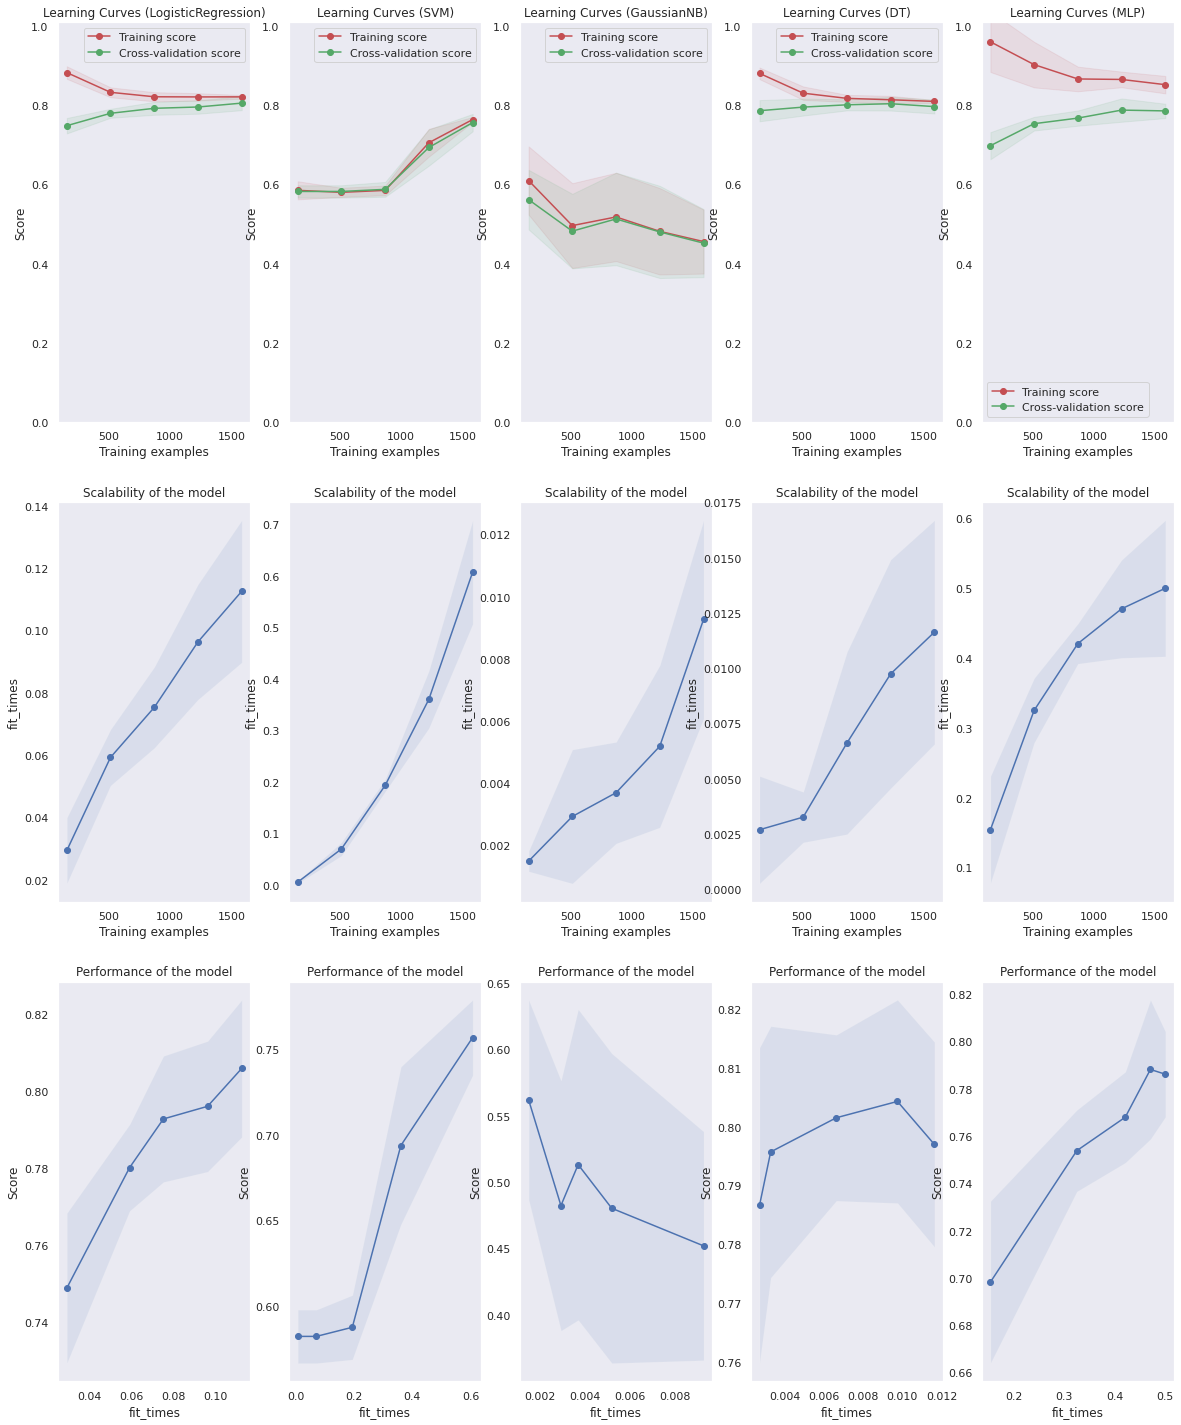

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC as SVM
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(3, 5, figsize=(20, 25))

title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (SVM)"
estimator = SVM(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)



title = "Learning Curves (GaussianNB)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (DT)"
estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)


title = "Learning Curves (MLP)"
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Kaplan-Meier-Estimator

In [206]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1984
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                1980 non-null   float64
 1   Type of Breast Surgery          1954 non-null   object 
 2   Cancer Type Detailed            1980 non-null   object 
 3   Cellularity                     1916 non-null   object 
 4   Chemotherapy                    1979 non-null   object 
 5   Pam50 + Claudin-low subtype     1979 non-null   object 
 6   ER status measured by IHC       1937 non-null   object 
 7   ER Status                       1980 non-null   object 
 8   Neoplasm Histologic Grade       1892 non-null   float64
 9   HER2 status measured by SNP6    1979 non-null   object 
 10  HER2 Status                     1979 non-null   object 
 11  Tumor Other Histologic Subtype  1936 non-null   object 
 12  Hormone Therapy                 19

Text(0.5, 0, 'timeline [months]')

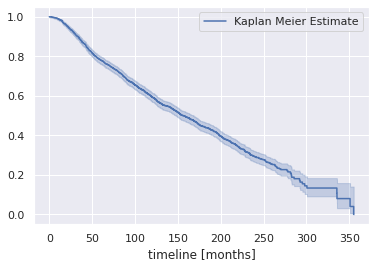

In [207]:
# Python code to create the above Kaplan Meier curve
from lifelines import KaplanMeierFitter

## Example Data 
durations = df_sel['Overall Survival (Months)']
event_observed = encoderLE.fit_transform(df_sel['Overall Survival Status'])

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot() ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
plt.xlabel('timeline [months]')

,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage,Type of Breast Surgery,...,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Oncotree Code,PR Status,Radio Therapy,Relapse Free Status,Sex,3-Gene classifier subtype
0,75.65,3.0,10.0,NaN,6.044,140.500000,138.65,22.0,2.0,1.0,...,2.0,1.0,4.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0
1,43.19,3.0,0.0,2.0,4.020,84.633333,83.52,10.0,1.0,0.0,...,2.0,2.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
2,48.87,2.0,1.0,2.0,4.030,163.700000,151.28,15.0,2.0,1.0,...,2.0,2.0,3.0,2.0,2.0,2.0,0.0,1.0,0.0,4.0
3,47.68,2.0,3.0,1.0,4.050,164.933333,162.76,25.0,2.0,1.0,...,2.0,2.0,10.0,2.0,6.0,2.0,2.0,0.0,0.0,4.0
4,76.97,3.0,8.0,2.0,6.080,41.366667,18.55,40.0,2.0,1.0,...,2.0,1.0,10.0,2.0,6.0,2.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,43.10,3.0,1.0,4.0,5.050,196.866667,194.28,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,42.88,3.0,1.0,6.0,5.040,44.733333,16.09,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,62.90,3.0,45.0,4.0,6.050,175.966667,121.18,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,61.16,2.0,12.0,15.0,5.050,86.233333,85.10,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
from lifelines import CoxPHFitter

df_sel_cat_class_num=pd.DataFrame()
for col in df_sel_cat_class.columns[0:12]:
    df_sel_cat_class_num[col]=encoderLE.fit_transform(df_sel_cat_class[col])

df_sel_spec=pd.concat([df_sel_num, df_sel_cat_class_num], axis=1, sort=False)
df_sel_dummy=pd.get_dummies(df_sel_spec, drop_first=True)
df_sel_dummy = df_sel_dummy[df_sel_dummy['Overall Survival (Months)'].notna()]
#obj sca
scaler=MinMaxScaler()

#fit imputer
imputer.fit(df_sel_dummy)

#trans
arr_sel_dummy_imp=imputer.transform(df_sel_dummy)

#fit scaling
scaler.fit(arr_sel_dummy_imp)
feat_sel_dummy_imp=scaler.transform(arr_sel_dummy_imp)
df_sel_dummy_imp=pd.DataFrame(feat_sel_dummy_imp,columns=df_sel_dummy.columns)





df_sel_dummy_imp['Overall Survival (Months)']=df_sel['Overall Survival (Months)'].copy()
df_sel_dummy_imp['Overall Survival Status']=encoderLE.fit_transform(df_status['Overall Survival Status'])

df_sel_dummy_imp = df_sel_dummy_imp[df_sel_dummy_imp['Overall Survival (Months)'].notna()]
df_sel_dummy_imp.info()

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_sel_dummy_imp, 'Overall Survival (Months)', event_col='Overall Survival Status')   ## Fit the data to train the model
#cph.print_summary()    ## HAve a look at the significance of the features
cph.plot()

NameError: name 'pd' is not defined

<AxesSubplot:>

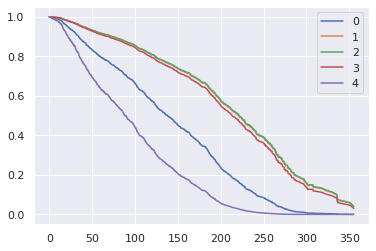

In [267]:
tr_rows = df_sel_dummy_imp.iloc[0:5,:]
tr_rows

cph.predict_survival_function(tr_rows).plot()

NameError: name 'self' is not defined